<a href="https://colab.research.google.com/github/skywalker0803r/Ricky/blob/master/PCA_ANN_approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from sklearn.datasets import load_boston
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import warnings;warnings.simplefilter('ignore')

In [0]:
data = load_boston()
X = pd.DataFrame(data.data,columns=data.feature_names)
y = pd.Series(data.target,name='Price')
df = X.join(y)

In [3]:
X = df[['LSTAT','Price']]
mm = MinMaxScaler(feature_range=(-1, 1))
X.loc[:,:] = mm.fit_transform(X.loc[:,:])
X.head()

,LSTAT,Price
0,-0.820640,-0.155556
1,-0.591060,-0.262222
2,-0.873068,0.320000
3,-0.933223,0.262222
4,-0.801325,0.386667


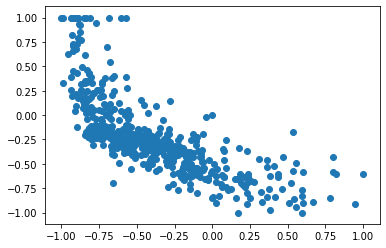

In [4]:
plt.scatter(X['LSTAT'],X['Price'])

In [0]:
pca = PCA(n_components=1)

In [6]:
X['z'] = pca.fit_transform(X)
X.head()

,LSTAT,Price,z
0,-0.820640,-0.155556,-0.339166
1,-0.591060,-0.262222,-0.103627
2,-0.873068,0.320000,-0.719796
3,-0.933223,0.262222,-0.719412
4,-0.801325,0.386667,-0.718628


## ANN method

In [7]:
import torch
from torch.nn import Linear,init,Sigmoid,Tanh
import torch.optim as optim

def build_net(input_shape,output_shape):
  net = torch.nn.Sequential(
      Linear(input_shape,output_shape,bias=False),
      Tanh()
      )
  return net

def init_weights(m):
  if type(m) == Linear:
    init.xavier_uniform(m.weight)

net = build_net(2,1)
net.apply(init_weights)
net

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=False)
  (1): Tanh()
)

# obj_function

In [0]:
def obj_function(x):
  SUM = 0
  x_len = len(x)
  x_mean = x[:,:].mean(axis=0)
  for idx in range(x_len):
    SUM += ((x[idx,:]-x_mean)**2)**(1/2)
  return -1*(SUM/x_len)

## optimizer

In [0]:
optimizer = optim.Adam(net.parameters(),lr=0.01)

# data_iter

In [0]:
data_iter = torch.tensor(X[['LSTAT','Price']].to_numpy(),dtype=torch.float)
data_iter = torch.utils.data.TensorDataset(data_iter)
data_iter = torch.utils.data.DataLoader(data_iter,batch_size=len(df))

# train loop

In [0]:
def train(net,data_iter,obj_function,optimizer,num_epochs=50):
  history = []
  for epoch in range(num_epochs):
    for data in data_iter:
      z = net(data[0])
      loss = obj_function(z)
      loss.mean().backward()
      optimizer.step()
      optimizer.zero_grad()
    print("epochs {} loss {:.4f}".format(epoch,loss.item()))
    history.append(loss.item())
  # plt train loss
  plt.plot(np.array(history))
  plt.title('train loss')
  return net

epochs 0 loss -0.2618
epochs 1 loss -0.2653
epochs 2 loss -0.2688
epochs 3 loss -0.2723
epochs 4 loss -0.2758
epochs 5 loss -0.2793
epochs 6 loss -0.2828
epochs 7 loss -0.2862
epochs 8 loss -0.2897
epochs 9 loss -0.2932
epochs 10 loss -0.2966
epochs 11 loss -0.3000
epochs 12 loss -0.3034
epochs 13 loss -0.3068
epochs 14 loss -0.3102
epochs 15 loss -0.3136
epochs 16 loss -0.3169
epochs 17 loss -0.3203
epochs 18 loss -0.3236
epochs 19 loss -0.3269
epochs 20 loss -0.3301
epochs 21 loss -0.3334
epochs 22 loss -0.3367
epochs 23 loss -0.3399
epochs 24 loss -0.3431
epochs 25 loss -0.3463
epochs 26 loss -0.3496
epochs 27 loss -0.3528
epochs 28 loss -0.3560
epochs 29 loss -0.3592
epochs 30 loss -0.3623
epochs 31 loss -0.3654
epochs 32 loss -0.3685
epochs 33 loss -0.3716
epochs 34 loss -0.3747
epochs 35 loss -0.3777
epochs 36 loss -0.3807
epochs 37 loss -0.3837
epochs 38 loss -0.3866
epochs 39 loss -0.3896
epochs 40 loss -0.3925
epochs 41 loss -0.3954
epochs 42 loss -0.3983
epochs 43 loss -0.401

Sequential(
  (0): Linear(in_features=2, out_features=1, bias=False)
  (1): Tanh()
)

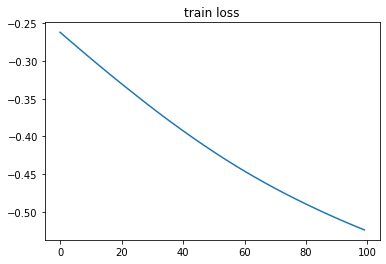

In [12]:
train(net,data_iter,obj_function,optimizer,num_epochs=100)

In [0]:
data_iter = torch.tensor(X[['LSTAT','Price']].to_numpy(),dtype=torch.float)
X['z_ann'] = net(data_iter).detach().numpy()

In [14]:
X.head().style.background_gradient(axis=0)

,LSTAT,Price,z,z_ann
0,-0.82064,-0.155556,-0.339166,-0.295823
1,-0.59106,-0.262222,-0.103627,0.0877663
2,-0.873068,0.32,-0.719796,-0.866496
3,-0.933223,0.262222,-0.719412,-0.847217
4,-0.801325,0.386667,-0.718628,-0.885542


In [15]:
X.describe()

,LSTAT,Price,z,z_ann
count,506.000000,506.000000,5.060000e+02,506.000000
mean,-0.397182,-0.220764,-8.463805e-17,0.131808
std,0.394098,0.408760,5.293167e-01,0.615992
min,-1.000000,-1.000000,-1.299884e+00,-0.992750
25%,-0.711921,-0.465556,-3.081081e-01,-0.315576
50%,-0.468543,-0.280000,2.453843e-03,0.235772
75%,-0.159768,-0.111111,3.371453e-01,0.671154
max,1.000000,1.000000,1.425622e+00,0.988685


In [16]:
pca.components_[0]

array([ 0.68939494, -0.72438568])

In [17]:
for param in net.parameters():
  print(param.data)

tensor([[ 0.7598, -2.0483]])


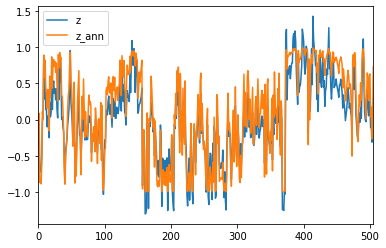

In [18]:
X[['z','z_ann']].plot()

In [0]:
X['z_ann'] = X['z_ann']*(-1)

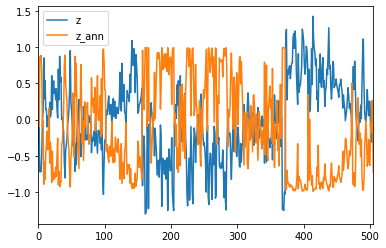

In [20]:
X[['z','z_ann']].plot()

In [21]:
pca.components_[0][0]/pca.components_[0][1]

-0.9516959808747333

In [22]:
param.data[0][0].detach().item()/param.data[0][1].detach().item()

-0.37096583167212077